<a href="https://colab.research.google.com/github/Parichat65154/pari/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!cp [path/to/your/archive] .

cp: cannot stat '[path/to/your/archive]': No such file or directory


In [8]:
!unzip archive.zip


Archive:  archive.zip
  inflating: Agricultural-crops/Cherry/image15.jpeg  
  inflating: Agricultural-crops/Cherry/image16.jpeg  
  inflating: Agricultural-crops/Cherry/image17.jpeg  
  inflating: Agricultural-crops/Cherry/image18.jpeg  
  inflating: Agricultural-crops/Cherry/image20.jpeg  
  inflating: Agricultural-crops/Cherry/image21.jpeg  
  inflating: Agricultural-crops/Cherry/image22.jpeg  
  inflating: Agricultural-crops/Cherry/image24.jpeg  
  inflating: Agricultural-crops/Cherry/image25.jpeg  
  inflating: Agricultural-crops/Cherry/image27.jpeg  
  inflating: Agricultural-crops/Cherry/image28.jpeg  
  inflating: Agricultural-crops/Cherry/image29.jpeg  
  inflating: Agricultural-crops/Cherry/image30.jpeg  
  inflating: Agricultural-crops/Cherry/image31.jpeg  
  inflating: Agricultural-crops/Cherry/images11.jpg  
  inflating: Agricultural-crops/Cherry/images16.jpg  
  inflating: Agricultural-crops/Cherry/images17.jpg  
  inflating: Agricultural-crops/Cherry/images19.jpg  
  infl

In [9]:
! ls "Agricultural-crops"

 almond         cotton		    mustard-oil		   sunflower
 banana         Cucumber	    Olive-tree		   tea
 cardamom      'Fox_nut(Makhana)'   papaya		   Tobacco-plant
 Cherry         gram		   'Pearl_millet(bajra)'   tomato
 chilli         jowar		    pineapple		  'vigna-radiati(Mung)'
 clove	        jute		    rice		   wheat
 coconut        Lemon		    soyabean
 Coffee-plant   maize		    sugarcane


In [10]:
ls  "Agricultural-crops"


 almond/        'Fox_nut(Makhana)'/      pineapple/
 banana/         gram/                   rice/
 cardamom/       jowar/                  soyabean/
 Cherry/         jute/                   sugarcane/
 chilli/         Lemon/                  sunflower/
 clove/          maize/                  tea/
 coconut/        mustard-oil/            Tobacco-plant/
 Coffee-plant/   Olive-tree/             tomato/
 cotton/         papaya/                'vigna-radiati(Mung)'/
 Cucumber/      'Pearl_millet(bajra)'/   wheat/


In [12]:
dataset_path =  "Agricultural-crops"

In [21]:
ls  "/content/Agricultural-crops/Cherry"

image15.jpeg  image24.jpeg  images11.jpg  images27.jpg  images53.jpg
image16.jpeg  image25.jpeg  images16.jpg  images30.jpg  images54.jpg
image17.jpeg  image27.jpeg  images17.jpg  images37.jpg  images8.jpg
image18.jpeg  image28.jpeg  images19.jpg  images3.jpg   images9.jpg
image20.jpeg  image29.jpeg  images20.jpg  images41.jpg
image21.jpeg  image30.jpeg  images21.jpg  images42.jpg
image22.jpeg  image31.jpeg  images25.jpg  images4.jpg


Successfully loaded image from: /content/Agricultural-crops/Cherry/image15.jpeg


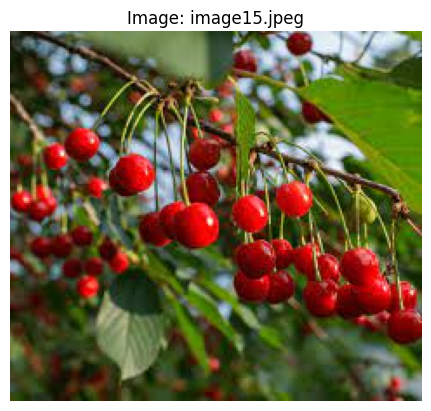

In [14]:
from skimage import io
import matplotlib.pyplot as plt
import os
import numpy as np

# กำหนด base path ของ dataset (จากที่คุณเคยตรวจสอบแล้วว่าเป็น /content/Agricultural-crops)
dataset_base_path = "/content/Agricultural-crops"

# กำหนด path ไปยังโฟลเดอร์ Cherry
cherry_folder_path = os.path.join(dataset_base_path, "Cherry")

# กำหนดชื่อไฟล์ภาพ
image_filename = "image15.jpeg"

# สร้าง path เต็มของไฟล์ภาพ
image_full_path = os.path.join(cherry_folder_path, image_filename)

# 1. อ่านภาพจากไฟล์
# ตรวจสอบว่าไฟล์ภาพมีอยู่จริงก่อนอ่าน
if os.path.exists(image_full_path):
    image = io.imread(image_full_path)
    print(f"Successfully loaded image from: {image_full_path}")

    # 2. แสดงภาพที่อ่านเข้ามา
    plt.imshow(image)
    plt.axis("off") # ปิดแกน
    plt.title(f"Image: {image_filename}") # ใส่ชื่อภาพเพื่อความชัดเจน
    plt.show()
else:
    print(f"Error: File not found at {image_full_path}")

In [15]:
from os import listdir
path_to_classes = "/content/Agricultural-crops"

folders = listdir(path_to_classes)
print("Number of Classes", len(folders))
print(folders)

Number of Classes 30
['almond', 'maize', 'Olive-tree', 'jute', 'coconut', 'banana', 'soyabean', 'Cherry', 'cotton', 'Fox_nut(Makhana)', 'wheat', 'Pearl_millet(bajra)', 'vigna-radiati(Mung)', 'rice', 'papaya', 'Cucumber', 'mustard-oil', 'Coffee-plant', 'tea', 'sugarcane', 'clove', 'jowar', 'Lemon', 'chilli', 'gram', 'Tobacco-plant', 'pineapple', 'sunflower', 'cardamom', 'tomato']


In [16]:
from os import listdir
path_dataset = "/content/Agricultural-crops/"
class_name = 'rice'

full_class_path = path_dataset + class_name
path_images = listdir(full_class_path)
print("Number of Images", len(path_images))
print(path_images)

Number of Images 29
['image (12).jpeg', 'image (4).jpg', 'image (1).jpeg', 'image (8).jpeg', 'image (9).jpeg', 'image (15).jpg', 'image (3).jpg', 'image (11).jpeg', 'image (1).jpg', 'image (10).jpeg', 'image (1).png', 'image (12).jpg', 'image (10).jpg', 'image (8).jpg', 'image (3).jpeg', 'image (2).jpeg', 'image (6).jpg', 'image (6).jpeg', 'image (7).jpg', 'image (7).jpeg', 'image (14).jpg', 'image (18).jpg', 'image (5).jpeg', 'image (11).jpg', 'image (19).jpg', 'image (13).jpg', 'image (4).jpeg', 'image (20).jpg', 'image (5).jpg']


In [18]:
from skimage import io
import os

path_dataset = "/content/Agricultural-crops/"
class_name = 'rice'
full_class_path = os.path.join(path_dataset, class_name)
path_images = os.listdir(full_class_path)
images = []
for idx, fname in enumerate(path_images):
    path = os.path.join(full_class_path, fname)
    img = io.imread(path)
    images.append(img)

    print(idx, img.shape)


0 (192, 263, 3)
1 (752, 759, 3)
2 (768, 1024, 3)
3 (182, 277, 3)
4 (174, 290, 3)
5 (600, 1000, 3)
6 (318, 479, 3)
7 (183, 275, 3)
8 (423, 652, 3)
9 (154, 327, 3)
10 (565, 1200, 3)
11 (199, 300, 3)
12 (322, 1024, 3)
13 (181, 279, 3)
14 (128, 394, 3)
15 (183, 275, 3)
16 (901, 1500, 3)
17 (163, 310, 3)
18 (400, 750, 3)
19 (183, 275, 3)
20 (357, 680, 3)
21 (960, 1920, 3)
22 (183, 276, 3)
23 (468, 1440, 3)
24 (2560, 2560, 3)
25 (328, 450, 3)
26 (174, 290, 3)
27 (278, 500, 3)
28 (690, 1200, 3)


/tmp/ipython-input-19-600771481.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(images[5])


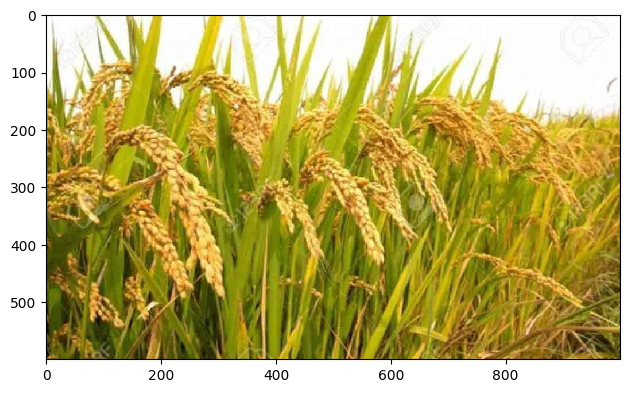

In [19]:
io.imshow(images[5])

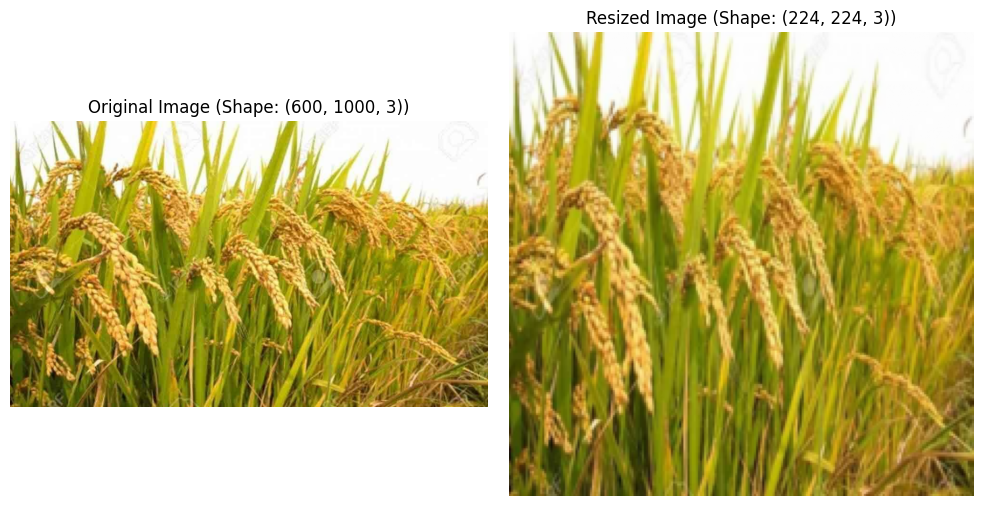

In [20]:
from skimage import transform
import matplotlib.pyplot as plt
import os
original_image = images[5]

image_resized = transform.resize(original_image, (224, 224))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title(f"Original Image (Shape: {original_image.shape})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_resized)
plt.title(f"Resized Image (Shape: {image_resized.shape})")
plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
from os import listdir

path_to_classes = "/content/Agricultural-crops"

# List the contents of the directory
folders = listdir(path_to_classes)

# Sort the list of folders alphabetically
folders.sort()

# Print the sorted list of folders
print("Classes (alphabetical order):")
print(folders)

Classes (alphabetical order):
['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']


In [23]:
from skimage import io, transform
from os import listdir
import os
from tqdm import tqdm
import numpy as np

def read_image(path_dataset, list_of_class_names):
    images = []
    labels = []
    for idx, c_name in enumerate(list_of_class_names):
        class_folder_path = os.path.join(path_dataset, c_name)
        if not os.path.exists(class_folder_path):
            print(f"Warning: Class folder '{class_folder_path}' does not exist. Skipping.")
            continue
        image_filenames = listdir(class_folder_path)
        print(f"Reading class: {c_name} (Label: {idx}) - Found {len(image_filenames)} images")
        for fname in tqdm(image_filenames):
            image_full_path = os.path.join(class_folder_path, fname)
            try:
                img = io.imread(image_full_path)
                if img is not None and len(img.shape) >= 2:
                    img_resized = transform.resize(img, (224, 224))
                    images.append(img_resized)
                    labels.append(idx)
                else:
                    print(f"Skipping malformed image: {image_full_path}")
            except Exception as e:
                print(f"Could not read image {image_full_path}: {e}")

    return images, labels
dataset_path = "/content/Agricultural-crops"
all_class_folders = sorted(listdir(dataset_path))
images_data, labels_data = read_image(dataset_path, all_class_folders)
print(f"\nTotal images loaded: {len(images_data)}")
print(f"Total labels loaded: {len(labels_data)}")
if images_data:
    print(f"Shape of first image: {images_data[0].shape}")
else:
    print("No images were loaded.")
print(f"First 5 labels: {labels_data[:5]}")

Reading class: Cherry (Label: 0) - Found 32 images


100%|██████████| 32/32 [00:00<00:00, 75.27it/s]


Reading class: Coffee-plant (Label: 1) - Found 29 images


100%|██████████| 29/29 [00:00<00:00, 73.86it/s]


Reading class: Cucumber (Label: 2) - Found 31 images


100%|██████████| 31/31 [00:02<00:00, 10.85it/s]


Reading class: Fox_nut(Makhana) (Label: 3) - Found 23 images


100%|██████████| 23/23 [00:00<00:00, 78.31it/s]


Reading class: Lemon (Label: 4) - Found 28 images


100%|██████████| 28/28 [00:00<00:00, 70.38it/s]


Reading class: Olive-tree (Label: 5) - Found 30 images


100%|██████████| 30/30 [00:01<00:00, 19.82it/s]


Reading class: Pearl_millet(bajra) (Label: 6) - Found 39 images


100%|██████████| 39/39 [00:03<00:00, 11.85it/s]


Reading class: Tobacco-plant (Label: 7) - Found 33 images


100%|██████████| 33/33 [00:00<00:00, 70.62it/s]


Reading class: almond (Label: 8) - Found 21 images


100%|██████████| 21/21 [00:01<00:00, 11.57it/s]


Reading class: banana (Label: 9) - Found 31 images


100%|██████████| 31/31 [00:04<00:00,  6.69it/s]


Reading class: cardamom (Label: 10) - Found 22 images


100%|██████████| 22/22 [00:00<00:00, 76.66it/s]


Reading class: chilli (Label: 11) - Found 23 images


100%|██████████| 23/23 [00:00<00:00, 74.62it/s]


Reading class: clove (Label: 12) - Found 30 images


100%|██████████| 30/30 [00:00<00:00, 70.33it/s]


Reading class: coconut (Label: 13) - Found 25 images


100%|██████████| 25/25 [00:04<00:00,  5.47it/s]


Reading class: cotton (Label: 14) - Found 32 images


100%|██████████| 32/32 [00:03<00:00,  9.80it/s]


Reading class: gram (Label: 15) - Found 25 images


100%|██████████| 25/25 [00:02<00:00, 10.43it/s]


Reading class: jowar (Label: 16) - Found 30 images


100%|██████████| 30/30 [00:01<00:00, 15.53it/s]


Reading class: jute (Label: 17) - Found 23 images


100%|██████████| 23/23 [00:01<00:00, 19.25it/s]


Reading class: maize (Label: 18) - Found 31 images


100%|██████████| 31/31 [00:01<00:00, 17.54it/s]


Reading class: mustard-oil (Label: 19) - Found 28 images


100%|██████████| 28/28 [00:01<00:00, 21.64it/s]


Reading class: papaya (Label: 20) - Found 23 images


100%|██████████| 23/23 [00:02<00:00, 10.85it/s]


Reading class: pineapple (Label: 21) - Found 25 images


100%|██████████| 25/25 [00:00<00:00, 47.22it/s]


Reading class: rice (Label: 22) - Found 29 images


100%|██████████| 29/29 [00:02<00:00, 10.38it/s]


Reading class: soyabean (Label: 23) - Found 30 images


100%|██████████| 30/30 [00:02<00:00, 13.30it/s]


Reading class: sugarcane (Label: 24) - Found 25 images


100%|██████████| 25/25 [00:02<00:00, 12.11it/s]


Reading class: sunflower (Label: 25) - Found 24 images


100%|██████████| 24/24 [00:03<00:00,  7.75it/s]


Reading class: tea (Label: 26) - Found 23 images


100%|██████████| 23/23 [00:00<00:00, 81.82it/s]


Reading class: tomato (Label: 27) - Found 26 images


100%|██████████| 26/26 [00:01<00:00, 20.96it/s]


Reading class: vigna-radiati(Mung) (Label: 28) - Found 27 images


100%|██████████| 27/27 [00:03<00:00,  7.06it/s]


Reading class: wheat (Label: 29) - Found 31 images


100%|██████████| 31/31 [00:02<00:00, 11.42it/s]


Total images loaded: 829
Total labels loaded: 829
Shape of first image: (224, 224, 3)
First 5 labels: [0, 0, 0, 0, 0]


In [24]:
len(images_data), len(labels_data)

(829, 829)

Label: 29


/tmp/ipython-input-25-2149492056.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(images_data[idx])


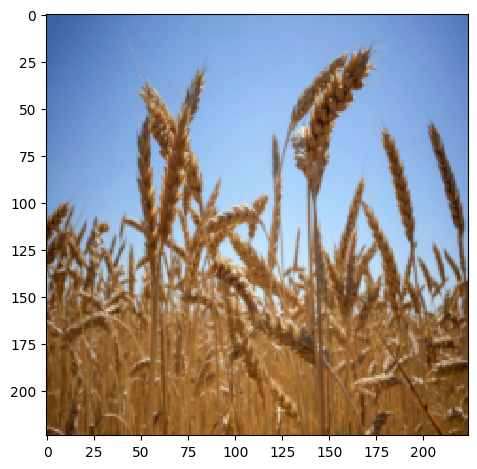

In [25]:
idx = 800
io.imshow(images_data[idx])
print(f"Label: {labels_data[idx]}")

In [28]:
#promt : resize all images
import numpy as np
from tqdm import tqdm
from skimage import transform

resized_image = []
for img in tqdm(images_data):
    img_resized = transform.resize(img, (224, 224))
    resized_image.append(img_resized[:,:,:3])
Xs = np.array(resized_image)
Ys = np.array(labels_data)

100%|██████████| 829/829 [00:01<00:00, 779.87it/s]


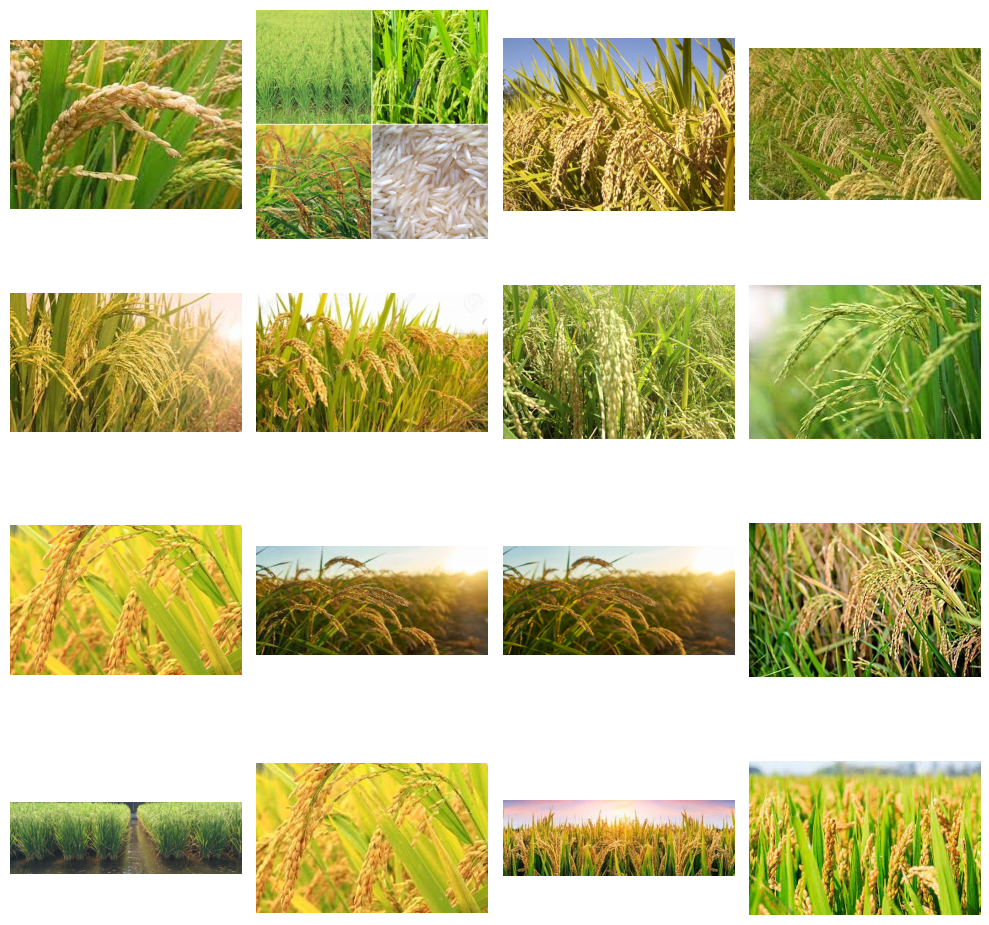

In [39]:
display_multiple_img(images[: 16], 4 , 4 )

In [41]:
from sklearn.model_selection import train_test_split
# สมมติว่า Xs คือ features (ข้อมูลภาพ) และ Ys คือ labels (ป้ายกำกับของภาพ)
X_train, X_test, y_train, y_test = train_test_split(
    Xs, Ys, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((663, 224, 224, 3), (166, 224, 224, 3), (663,), (166,))

In [48]:
import numpy as np
# The variable 'class_names' is not defined. Please define it before running this cell.
for label in range(len(class_names)):
    print(f"\n--- Class: {class_names[label]} ---")
    idx = np.where(Ys == label)[0][:16]
    if len(idx) > 0:
        display_multiple_img(Xs[idx], 4, 4, title_prefix=f"{class_names[label]} Image")
    else:
        print(f"No images found for class '{class_names[label]}'.")

NameError: name 'class_names' is not defined

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
IMG_HEIGHT, IMG_WIDTH = 224, 224
IMG_CHANNELS = 3
NUM_CLASSES = 30
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

print("\nCNN Model architecture created successfully.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │     2,595,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689,118 (10.26 MB)

 Trainable params: 2,689,118 (10.26 MB)

 Non-trainable params: 0 (0.00 B)


CNN Model architecture created successfully.


In [51]:
#promt: create optimize adam for CNN
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
#promt: train model cnn
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 231ms/step - accuracy: 0.9258 - loss: 0.3962 - val_accuracy: 0.2771 - val_loss: 5.7437
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9452 - loss: 0.3679 - val_accuracy: 0.2711 - val_loss: 5.2440
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9782 - loss: 0.0956 - val_accuracy: 0.3253 - val_loss: 5.6437
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9865 - loss: 0.0481 - val_accuracy: 0.2771 - val_loss: 6.8410
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9922 - loss: 0.0352 - val_accuracy: 0.2711 - val_loss: 7.1915
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.2831 - val_loss: 6.1782
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9748 - loss: 0.1006 - val_accuracy: 0.2590 - val_loss: 5.7032
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9843 - loss: 0.0842 - val_accuracy: 0.2952 - 

In [61]:
#promt : create mobel mobilenetv2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(class_name),activation='softmax')
])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 556ms/step - accuracy: 0.0351 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 2/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.0283 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 3/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0320 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 4/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0270 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 5/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0227 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 6/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0287 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 7/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0320 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 8/40
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0192 - loss: nan - val_accuracy: 0.0301 - val_loss: nan
Epoch 9/40
21/21 ━━━━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0294 - loss: nan
Test accuracy: 0.0301204826682806


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


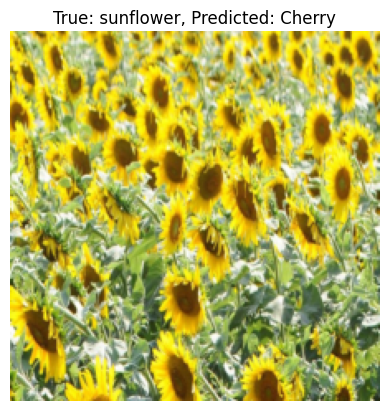

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


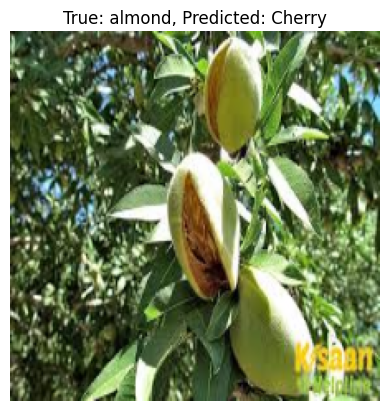

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


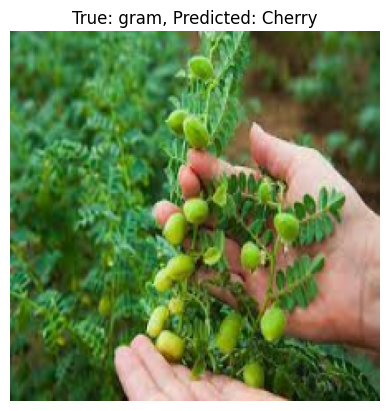

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


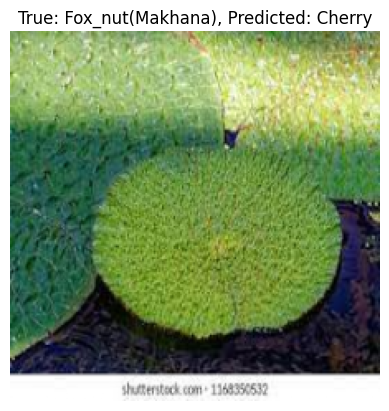

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


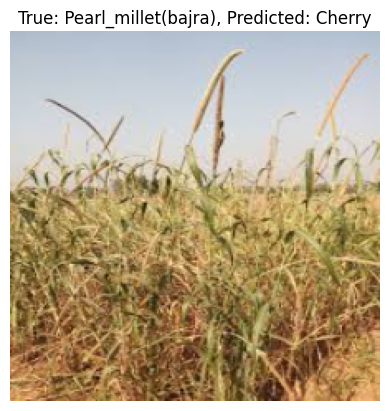

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


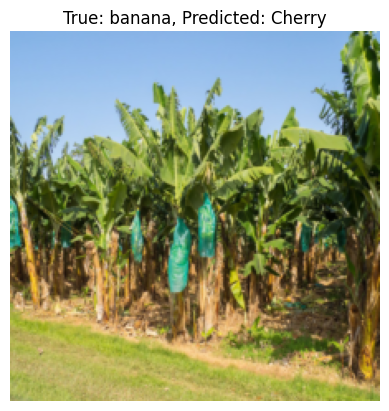

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


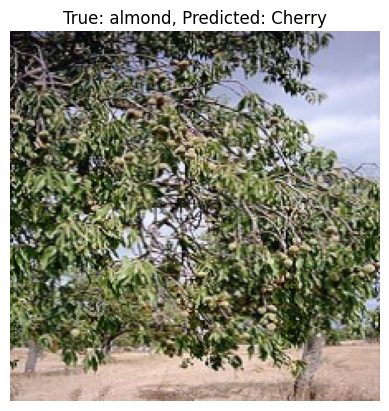

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


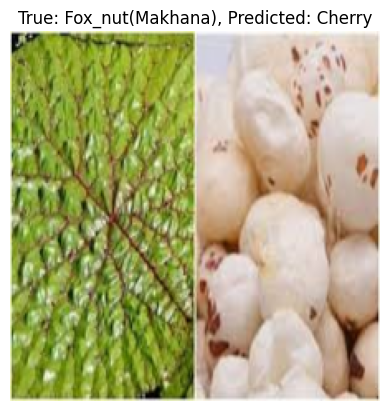

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


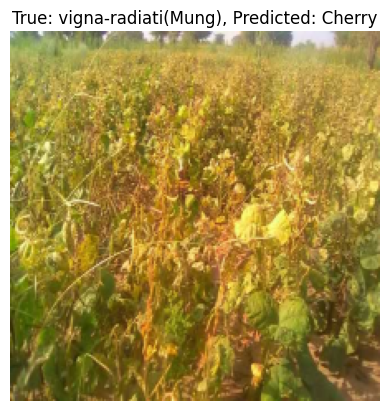

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


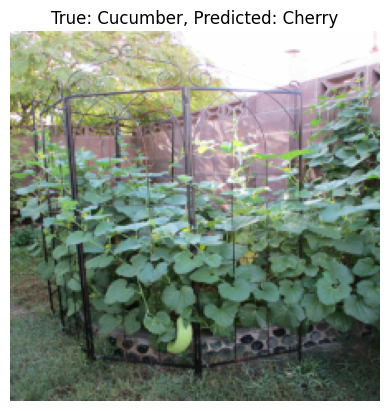

In [69]:
# prompt: random test 10 image and show image , label, predict

import matplotlib.pyplot as plt
import numpy as np
import random

random_indices = random.sample(range(len(X_test)), 10)

for idx in random_indices:
    image = X_test[idx]
    true_label = class_names[y_test[idx]]

    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = class_names[np.argmax(prediction)]

    plt.imshow(image)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

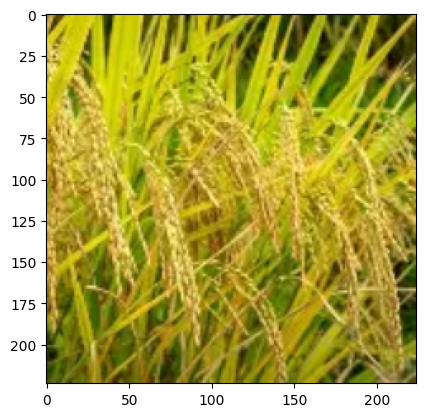

In [71]:
ing = io.imread('rice.jpg')
img_r = transform.resize(ing, (224, 224))
plt.imshow(img_r)

In [76]:
# prompt: predict image model
import numpy as np

prediction = model.predict(np.expand_dims(img_r, axis=0))
predicted_label = class_names[np.argmax(prediction)]

print("Predicted Class:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class: Cherry


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 375ms/step


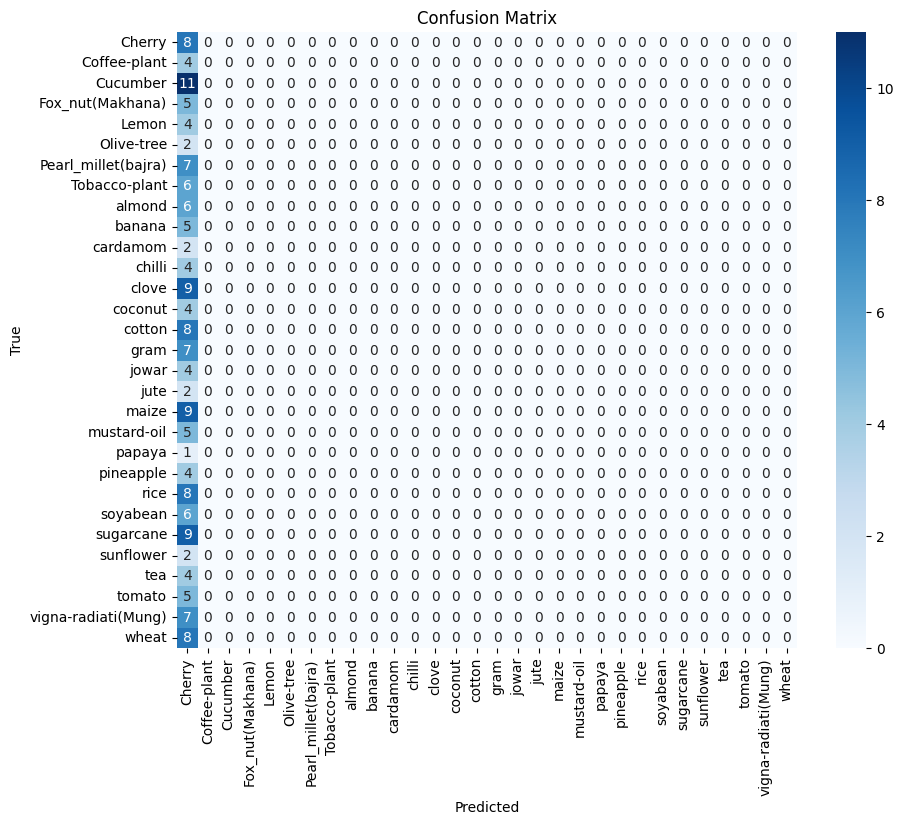

In [78]:
#promt: create confusion matrix test set
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
